# **Topic Identification**
Topic identification is the challenge of automatically finding topics
in a given text. This can be done in supervised and unsupervised ways. For example, an algorithm labels newspaper articles with known topics such
as ”sports,” ”politics,” or ”culture.” In this case, we have predefined topics and labeled training data and could train our model in a supervised way. If we do not know the topics in advance and want our algorithm to find clusters of similar topics, we deal with topic modeling or topic discovery, in an unsupervised way [[1]](#scrollTo=1eUuDaNxZ_ms).


This notebook shows examples for the following topics:<br>

* Unsupervised topic identification with Gensim’s LDA model

* Supervised topic identification with ``simpletransformers``

## **Unsupervised topic identification with Gensim’s LDA model**

Latent Dirichlet allocation (LDA) is a common technique used for unsupervised topic modeling. This method use document embeddings, i.e., vector representations of documents. Then the vector’s dimensionality is reduced with techniques such as singular value decomposition (SVD). Unsupervised topic modeling techniques are often used as a preprocessing step for supervised topic identification [[1]](#scrollTo=1eUuDaNxZ_ms).

``gensim`` is a Python library for topic modeling. It enables the extraction of topics in an unsupervised way using LDA.
For more details about Gensim's LDA model, please refer to [[2]](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html).

### Import the ``nltk`` library and download ``wordnet``
``nltk``(Natural Language Toolkit) is an open source Python library for natural language processing. For more detail about ``nltk``, please refer to [[3]](https://www.nltk.org/api/nltk.html#nltk.wsd.lesk).

``wordnet`` is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms, each expressing a distinct concept. Synonyms are interlinked by means of conceptual-semantic and lexical relations [[4]](http://www.nltk.org/howto/wsd.html).

In [ ]:
# Import nltk module
import nltk

# Download "wordnet" package by using the nltk module
nltk.download('wordnet')

# The module 'RegexpTokenizer' is used to split a string into substrings using a regular expression
from nltk.tokenize import RegexpTokenizer

# The module "punkt" is used to lemmatize the words using WordNet's built-in morphy function
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Import ``gensim``

In [ ]:
# Import gensim
from gensim import corpora, models
import gensim

### Create sample document

In [ ]:
# Create sample document

doc_set = [
           'Ben Roethlisburger, Mike Tomlin, and the rest of the Pittsburgh Steelers are in unchartered terretory.',
           'For the first time in the franchise\'s 87-year history, Pittsbourgh is undefeated through nine games after the Steelers breezed by the Bengalas Sunday at Heinz Field.'
           ]

### Tokenize the document

In [ ]:
# Split the documents into tokens
## \w+ matches one or more alphanumeric characters
tokenizer = RegexpTokenizer(r'\w+')

# Convert text to lowercase and tokenize
for idx in range(len(doc_set)):
    doc_set[idx] = doc_set[idx].lower()  
    doc_set[idx] = tokenizer.tokenize(doc_set[idx])

# Remove numbers, but not words that contain numbers
doc_set = [[token for token in doc if not token.isnumeric()] for doc in doc_set]

# Remove words that are only one character
doc_set = [[token for token in doc if len(token) > 1] for doc in doc_set]

### Lemmatize the document

We use the ``WordNetLemmatizer()`` function from ``nltk`` library. A lemmatizer is preferred over a stemmer in this case because it produces more readable words. Output that is easy to read is very desirable in topic modeling [[2]](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html).

In [ ]:
# Lemmatize the documents
lemmatizer = WordNetLemmatizer()
doc_set = [[lemmatizer.lemmatize(token) for token in doc] for doc in doc_set]

### Create dictionary

In [ ]:
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(doc_set)

### Vectorize the document and create corpus

We transform the documents to a vectorized form. We simply compute the frequency of each word, including the bigrams.

In [ ]:
# Bag-of-words representation of the documents
corpus = [dictionary.doc2bow(doc) for doc in doc_set]

In [ ]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 34
Number of documents: 2


### Set training parameters and create model

The number of dimensions is a parameter that can be freely chosen. It represents the number of topics. For example, if we set this parameter to ten,
we ask our unsupervised clustering algorithm to group our news article dataset into ten topics represented as a ten-dimensional vector for each of our documents. In this example, we defined number of topics as two [[1]](#scrollTo=1eUuDaNxZ_ms).

``chunksize`` controls how many documents are processed at a time in the training algorithm. Increasing chunksize will speed up training, at least as long as the chunk of documents easily fit into memory. In this example, we set ``chunksize = 2000``, which is more than the number of documents, so we process all the data at a single time. Chunksize can however influence the quality of the model [[2]](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html).

``passes`` controls how often we train the model on the entire corpus. Another word for passes might be “epochs”. 

``iterations`` defines how often we repeat a particular loop over each document. It is important to set the number of ``passes`` and ``iterations`` high enough [[2]](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html).


In [ ]:
# Set training parameters.
num_topics = 2
chunksize = 2000
passes = 10
iterations = 400

# Make an "index to word" dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
)

### Apply model to the corpus

In [ ]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics

print('Average topic coherence: %.4f.' % avg_topic_coherence)

Average topic coherence: -9.5434.


### Print topic scores

In [ ]:
from pprint import pprint
pprint(top_topics)

[([(0.112645924, 'the'),
   (0.04431637, 'steelers'),
   (0.044310637, 'in'),
   (0.025911452, 'year'),
   (0.025869505, 'through'),
   (0.025863118, 'nine'),
   (0.025858391, 'are'),
   (0.025854172, 'roethlisburger'),
   (0.025850834, 'by'),
   (0.025846124, 'of'),
   (0.025832765, 'time'),
   (0.02579958, 'field'),
   (0.025798203, 'heinz'),
   (0.025793767, 'mike'),
   (0.025791502, 'unchartered'),
   (0.025789702, 'rest'),
   (0.025773773, 'pittsbourgh'),
   (0.025760438, 'franchise'),
   (0.025758993, 'breezed'),
   (0.025753003, 'is')],
  -9.543422031277052),
 ([(0.08742177, 'the'),
   (0.040971987, 'steelers'),
   (0.040961646, 'in'),
   (0.027060727, 'year'),
   (0.02698423, 'through'),
   (0.026972594, 'nine'),
   (0.02696417, 'are'),
   (0.026956487, 'roethlisburger'),
   (0.026950212, 'by'),
   (0.026941827, 'of'),
   (0.026917312, 'time'),
   (0.026856938, 'field'),
   (0.026854431, 'heinz'),
   (0.02684655, 'mike'),
   (0.026842428, 'unchartered'),
   (0.02683916, 'rest')

In [ ]:
print(model.print_topics(num_topics=2, num_words=4))

[(0, '0.129*"the" + 0.046*"steelers" + 0.046*"in" + 0.030*"after"'), (1, '0.119*"the" + 0.054*"steelers" + 0.054*"in" + 0.036*"pittsburgh"')]


In [ ]:
print(model.print_topics(num_topics=2, num_words=2))

[(0, '0.129*"the" + 0.046*"steelers"'), (1, '0.119*"the" + 0.054*"steelers"')]


## **Supervised topic identification with ``simpletransformers``**

### Install ``simpletransformers``

**Note:**<br>
Deep Learning (DL) models are typically run on CUDA-enabled GPUs as the performance is far, far superior compared to running on a CPU. This is especially true for Transformer models considering that they are quite large even in relation to other DL models [[5]](https://simpletransformers.ai/docs/usage/#enablingdisabling-cuda). 

On all ``simpletransformers`` models, CUDA is enabled by default. Because of that, in order to proceed, you have to enable CUDA in your GPU. Please go to your notebook runtime type settings and choose "GPU". In colab GPU, CUDA is pre-installed. 
If you want to run the code without CUDA, you should disable it during the ["create classification model"](#scrollTo=DmfjRTC21KCt)  process.


In [ ]:
# Important: After installing simpletransformers, you must restart the runtime.

!pip install simpletransformers


     |████████████████████████████████| 249 kB 10.7 MB/s 
     |████████████████████████████████| 346 kB 19.8 MB/s 
     |████████████████████████████████| 6.6 MB 28.5 MB/s 
     |████████████████████████████████| 1.8 MB 36.1 MB/s 
     |████████████████████████████████| 4.2 MB 36.0 MB/s 
     |████████████████████████████████| 1.2 MB 35.7 MB/s 
     |████████████████████████████████| 43 kB 1.2 MB/s 
     |████████████████████████████████| 10.1 MB 31.6 MB/s 
     |████████████████████████████████| 84 kB 2.4 MB/s 
     |████████████████████████████████| 596 kB 45.2 MB/s 
     |████████████████████████████████| 181 kB 40.0 MB/s 
     |████████████████████████████████| 145 kB 52.8 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 1.1 MB 43.2 MB/s 
     |████████████████████████████████| 140 kB 54.5 MB/s 
     |████████████████████████████████| 212 kB 54.1 MB/s 
     |████████████████████████████████| 127 kB 52.0 MB/s 
     |█████████████

### Load dataset

We will download a dataset from [kaggle.com](www.kaggle.com). For this, you must sign up for an account first.

To load the dataset into colab, you can:
- download the dataset to your local drive and upload it to colab environment
- load dataset directly from kaggle.com

#### Option-1: Upload dataset from a local storage

This option takes more time compared to the second option. Because you will download the dataset to your local drive and upload it to colab. To download the dataset, please click [this link](https://www.kaggle.com/datasets/rmisra/news-category-dataset). Then run the following code and choose the downloaded json file.

In [ ]:
# Upload dataset from local drive
from google.colab import files

files.upload()

{}

#### Option-2: Download dataset from kaggle.com via api

This option takes less time because colab will take the dataset directly from Kaggle. To download a dataset from Kaggle, there is an [official kaggle-api](https://github.com/Kaggle/kaggle-api) which makes the usage very easy.

##### 1- Create folder

Structure the colab environment for the dataset from [kaggle.com](www.kaggle.com) as follows:

content/
>> kaggle/
>>> News_Category_Dataset_v2.json 

In [ ]:
# Create 'kaggle' folder
!mkdir '/content/kaggle'

##### 2- Create Kaggle API Token

For authentication, you should create an api-token in your Kaggle account page and then upload it to colab environment. By doing so, you allow colab to access your Kaggle account for downloading the dataset.

* Create API Token:<br>
To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com. 
Then go to the 'Account' tab of your user profile (*kaggle.com/username/account*) and 
select 'Create API Token'. This will trigger the download of kaggle.json, a file containing your API credentials. 
Place this file in the location 'root/.kaggle/kaggle.json'.

* Secure your API Token:<br>
For your security, ensure that other users of your computer do not have read access to your credentials.
On Unix-based systems you can do this with the following command:
``chmod 600 ~/.kaggle/kaggle.json``

In [ ]:
# Prepare folders in the colab environment
import os

os.mkdir('/root/.kaggle')
os.chdir('/root/.kaggle')

In [ ]:
# After downloading the API Token, upload it to colab

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emrahyener","key":"18159badcc78760ab64a5c9a80b62671"}'}

In [ ]:
# Allocate the required permission for this API Token
## This code modifies the access such that only you can access and read the kaggle.json file
## The permission code 600 means "the owner can read and write"
os.chmod('/root/.kaggle/kaggle.json', 600)

# Get back to the Kaggle folder
os.chdir('/content/kaggle')

In [ ]:
# Download dataset
!kaggle datasets download -d rmisra/news-category-dataset

 98% 25.0M/25.4M [00:01<00:00, 24.4MB/s]
100% 25.4M/25.4M [00:01<00:00, 18.6MB/s]


In [ ]:
 # Unpack dataset
!unzip news-category-dataset.zip

Archive:  news-category-dataset.zip
  inflating: News_Category_Dataset_v2.json  


In [ ]:
# Get back to the default ('content/') location
!cd ..

### Import libraries

We import all necessary libraries. Among the ``simpletransformers`` library,
we also need functions from ``sklearn`` and the ``pandas``
library to load and extract our training text corpus from the
JSON file. In google-colab, ``pandas`` and ``sklearn`` are pre-installed [[1]](#scrollTo=1eUuDaNxZ_ms).


In [ ]:
import pandas as pd
from simpletransformers.classification import ClassificationModel
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


### Create pandas dataframe

We extract our dataset and import it into a ``pandas`` dataframe.




In [ ]:
# Read data from JSON
df = pd.read_json("/content/kaggle/News_Category_Dataset_v2.json", orient="records", lines=True)

We list the first three rows to see the dataframe content:




In [ ]:
# List the first three rows
df.head(3)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26


### Visualize categories for an overview
To have an idea about the category distribution, you can use ``matplotlib`` library.

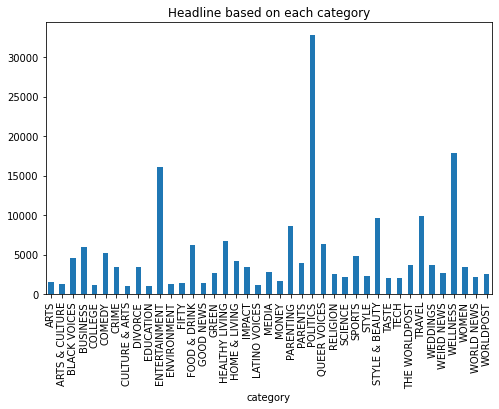

In [ ]:
# Import pyplot from matplotlib library
from matplotlib import pyplot as plt

# Plot a bar chart and display category distribution based on headline count
ax = df.groupby("category").count()["headline"].plot(kind="bar", 
                                                 figsize=(8, 5),
                                                 title="Headline based on each category")

plt.show()

### Data preparation

#### Create dataframe

Our classification model expects its input in a certain structure. For this, we will create a new dataframe which has two columns; ``text`` and ``labels``.

The column ``text`` contains the concatenated headlines and corresponding short descriptions. The column ``labels`` contains the category of the article.

In [ ]:
# Create a new dataframe
data = pd.DataFrame()

# Create "text" column, concatenate headline and short description fields
data["text"] = df.headline + " " + df.short_description

# Create "labels" column and save categories
data["labels"] = df.category

# Print the first three rows of the new structure
data.head(3)

,text,labels
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME
1,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT
2,Hugh Grant Marries For The First Time At Age 5...,ENTERTAINMENT


#### List unique labels

The classification model needs to get only unique labels. The function ``unique()`` lists only the unique labels from the given dataframe.

In [ ]:
# List unique labels from the dataframe and save it to a new list "labels"
labels = list(data["labels"].unique())

#### Convert labels to numerical values

Since our model accepts only numeric values for the target features (our article categories),
we need to use scikit-learn’s ``LabelEncoder`` to encode our string-based
labels (“CRIME,” “SPORTS,” “ENTERTAINMENT”) as integers [[1]](#scrollTo=1eUuDaNxZ_ms).

In [ ]:
# Convert labels to numerical values. For this, we use unique "labels" list
le = preprocessing.LabelEncoder()
le.fit(labels)

# Delete label descriptions in the dataframe "labels" column and write encoded numerical values instead.
data["labels"] = le.transform(data["labels"])

#### Create training and test set

We split our dataset into training (80%) and evaluation set (20%) using scikit-learn’s
``train_test_split()`` function. Please note that we refrain from creating a
third set for the final evaluation to simplify this demonstration [[1]](#scrollTo=1eUuDaNxZ_ms).

In [ ]:
# Create training and evaluation datasets
## test_size=0.2 means that the size of the evaluation(test) dataset is 20%
## So, the training dataset size is 80%
train_df, eval_df = train_test_split(data, test_size=0.2)

### Create classification model

Now, we create our classification model. We use the ``bert_base_uncased`` model from the ``bert`` model family. The number of labels (categories) is set
through the ``num_labels`` parameter [[1]](#scrollTo=1eUuDaNxZ_ms).

**NOTE:** 
On all ``simpletransformers`` models, CUDA is enabled by default. Because of that, in order to proceed, you have to enable CUDA in your GPU. Please go to your notebook runtime type settings and choose "GPU". In colab GPU, CUDA is pre-installed. 

If you want, you can also disable CUDA.

Option-1: With CUDA (Recommended)

In [ ]:
# Create a classification model
## We will use 'bert' classification model
## We choose "uncased" (lowercase) bert model
## num_labels specifies he number of labels or classes in the dataset

model = ClassificationModel('bert',
                            'bert-base-uncased',
                            num_labels=len(labels))

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Option-2: Without CUDA


In [ ]:
# Run this code to only disable CUDA:

#model = ClassificationModel('bert',
#                            'bert-base-uncased',
#                            num_labels=len(labels),
#                            use_cuda=False))

### Train model

We can start training our model. This automatically downloads the pre-trained
BERT model, initializes its parameters and preprocesses our training data using a
subword tokenizer before the actual training process is started [[1]](#scrollTo=1eUuDaNxZ_ms).

In [ ]:
# Train the model
model.train_model(train_df)

  0%|          | 0/160682 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/20086 [00:00<?, ?it/s]

(20086, 1.9772526447984027)

### Evaluation

We evaluate the model by using our evaluation set.

In [ ]:
# Evaluate the model
result, model_outputs, predictions = model.eval_model(eval_df)

  0%|          | 0/40171 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5022 [00:00<?, ?it/s]

In [ ]:
print(result)

{'mcc': 0.48644475503243495, 'eval_loss': 1.7304993399891042}


In [ ]:
print(model_outputs)

[[-2.42773438 -0.33496094  2.83789062 ...  3.24609375 -1.32128906
  -2.58984375]
 [ 0.88623047 -1.984375    0.47973633 ...  0.9375     -2.59765625
   1.36523438]
 [-2.06640625 -0.87841797  0.85546875 ... -0.7109375  -1.69824219
  -2.70117188]
 ...
 [-2.2734375  -1.12792969  3.43554688 ...  0.70458984  1.63867188
  -0.66552734]
 [-0.13867188 -1.45117188  1.06835938 ...  1.11523438 -1.11621094
   0.12744141]
 [ 0.13989258 -0.75537109 -0.88427734 ...  3.13867188 -1.84667969
  -0.78027344]]


# **References**

- [1] Course Book "NLP and Computer Vision" (DLMAINLPCV01)
- [2] https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html
- [3] https://www.nltk.org/api/nltk.html#nltk.wsd.lesk
- [4] http://www.nltk.org/howto/wsd.html
- [5] https://simpletransformers.ai/docs/usage/#enablingdisabling-cuda


Copyright © 2022 IU International University of Applied Sciences